# Simple Data Processing and Vanilla Model of Credit Scores

## 1. Load Relevant Libraries

In [1]:
import numpy as np
import pandas as pd

## 2. Data Loading and Column investigation


In [2]:
# 파일 경로 표
FILE_DIR = './cleaned_train.csv'
#전처리 없는 원본 데이터
raw_df = pd.read_csv(FILE_DIR)

#전처리 하고, 학습을 위한 데이터
train_df = pd.read_csv(FILE_DIR)

print(raw_df.shape)
print(train_df.shape)

(100000, 28)
(100000, 28)


In [3]:
# 전처리 이전 모든 Feature
raw_cols = list(raw_df.columns)
raw_cols

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [12]:
# 라벨 인코딩 대상 Feature
label_cols = [
    'Customer_ID',
    'Payment_of_Min_Amount',
    'Payment_Behaviour', # 라벨인코딩 또는 순서대로 대치
]

# 삭제 대상 Feature
drop_cols =[
    'ID',
    'Name',
    'SSN',
    'Occupation',
    'Annual_Income',
    'Type_of_Loan']

# 더미생성을 위한 Featue
dummy_cols = [
    'Num_of_Loan',             # 5 기준
    'Changed_Credit_Limit',    # 12기준
    'Credit_History_Age',      # 180 기준
]

# 로그변환 대상 Feature
log_scale_cols = [
    'Monthly_Inhand_Salary'
]

# sqrt 변환을 위한 Feature
sqrt_scale_cols = [
    'Outstanding_Debt'
]

#정규화를 위한 feature
standard_cols =[

]

#원핫인코딩 대상 feature
onehot_cols =[

]

#PCA 대상 Feature
pca_cols = [

]

# Feature 특징을 고려한 개별 전처리
others_cols =[
    'Age', # 특정 숫자 기준으로 구간화
    'Credit_Mix', # Bad 0, Standard 1 , Good 2
    'Credit_Score', # Poor 0 , Standard 1, Good 2로 대치
]



#전처리 없는 Feature
processless_cols = (set(raw_cols) - set(label_cols) - set(dummy_cols) - set(drop_cols)
                    - set(log_scale_cols) - set(sqrt_scale_cols) - set(others_cols)
                    -set(pca_cols) - set(standard_cols) - set(onehot_cols))
processless_cols = list(processless_cols)

In [13]:
print(processless_cols)

['Num_Bank_Accounts', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Total_EMI_per_month', 'Credit_Utilization_Ratio', 'Num_Credit_Card', 'Interest_Rate', 'Month']


## 3. Drop Irrelevant Columns

In [6]:
def drop_do(cols,input_data):
    """
    feature 삭제를 위한 code
    param:
      cols : 삭제 대상 feature
      input_data : 삭제전 전체 데이터

    return : 전체 데이터에서 삭제 대상 feture 삭제후 결과
    """
    data = input_data.copy()

    return data.drop(cols,axis=1)

In [8]:
# 2.2 drop
# raw 데이터 기준에서 제거

train_df = drop_do(drop_cols, raw_df)

raw_df.shape, train_df.shape

((100000, 28), (100000, 22))

## 4. Encoding

### 4-1. Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

def label_encoding_do(cols,input_data):
    """
    라벨 인코딩을 위한 함수
    param :
    cols : 라벨인코딩 대상 feture
    data : 전처리를 위한 데이터

    return : 전체 데이터에서 대상 특징만 라벨인코딩 한 결과
    """

    data = input_data.copy()

    #라벨인코더 객체 생성


    #라벨인코딩 대상 Feature 하나씩 처리
    for col in cols:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

    return data

In [15]:
#2.3 라벨인코딩
train_df = label_encoding_do(label_cols,train_df)

print('라벨인코딩 전')
print(raw_df[label_cols].head())
print('\n라벨인코딩 후')
print(train_df[label_cols].head())

라벨인코딩 전
   Customer_ID Payment_of_Min_Amount                 Payment_Behaviour
0         3392                    No   High_spent_Small_value_payments
1         3392                    No    Low_spent_Large_value_payments
2         3392                    No   Low_spent_Medium_value_payments
3         3392                    No    Low_spent_Small_value_payments
4         3392                    No  High_spent_Medium_value_payments

라벨인코딩 후
   Customer_ID  Payment_of_Min_Amount  Payment_Behaviour
0          576                      1                  2
1          576                      1                  3
2          576                      1                  4
3          576                      1                  5
4          576                      1                  1


In [16]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,Good
1,576,2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162,Good
2,576,3,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,1,49.574949,21.465380,4,331.209863,Good
3,576,4,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,1,49.574949,21.465380,5,223.451310,Good
4,576,5,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,Good,809.98,24.797347,269.0,1,49.574949,21.465380,1,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9254,4,25.0,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,Good,502.38,34.663572,378.0,1,35.104023,24.028477,0,479.866228,Poor
99996,9254,5,25.0,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,Good,502.38,40.565631,379.0,1,35.104023,24.028477,1,496.651610,Poor
99997,9254,6,25.0,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,Good,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,Poor
99998,9254,7,25.0,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,Good,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979,Standard


In [17]:
def replace(df,col, replace_dictionary):
    # apply를 위한 함수
    dic = replace_dictionary
    for key in dic:
        if df[col] == key:
            return dic[key]

def replacement_do (col,input_data,replace_dictionary):
    """
    원하는 값으로 대치하기 위한 함수
    param:
      col: 대상 feature
      data: 원본데이터
      replace_dictionary : 대치를 위한 조건 사전
                          ex) {'Good':1, 'Standard':2, 'Bad':0}
    """

    data = input_data.copy()

    data[col] = data.apply(replace, axis=1,args=[col, replace_dictionary])

    return data

In [18]:
train_df = replacement_do('Credit_Mix',train_df,{'Bad':0,'Standard':1,'Good':2})
train_df = replacement_do('Credit_Score',train_df,{'Poor':0,'Standard':1,'Good':2})

In [19]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,2
1,576,2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,2,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162,2
2,576,3,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,28.609352,267.0,1,49.574949,21.465380,4,331.209863,2
3,576,4,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,2,809.98,31.377862,268.0,1,49.574949,21.465380,5,223.451310,2
4,576,5,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,2,809.98,24.797347,269.0,1,49.574949,21.465380,1,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9254,4,25.0,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,2,502.38,34.663572,378.0,1,35.104023,24.028477,0,479.866228,0
99996,9254,5,25.0,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,2,502.38,40.565631,379.0,1,35.104023,24.028477,1,496.651610,0
99997,9254,6,25.0,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,2,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,0
99998,9254,7,25.0,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,2,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979,1


## 5. 데이터 분할

In [20]:
# 최종 2개월 valid로 분리
train = train_df.loc[train_df['Month'] <=6]
valid = train_df.loc[train_df['Month'] >6]
train.shape, valid.shape

((75000, 22), (25000, 22))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train = train.drop(['Credit_Score'], axis=1)
y_train = train['Credit_Score']

X_valid = valid.drop(['Credit_Score'], axis=1)
y_valid = valid['Credit_Score']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((75000, 21), (75000,), (25000, 21), (25000,))

## 6. Baseline Model

베이스라인 모델을 beating 하는 것을 목표로 한다.

In [23]:
from lightgbm import LGBMClassifier

In [24]:
lgb_clf = LGBMClassifier(objective='multiclass',
                         num_class=3,
                         random_state=42,
                         n_jobs=-1)

In [25]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier(num_class=3, objective='multiclass', random_state=42)

### Evaluatoin

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    y_pred = model.predict(X_test)

    # for pred in result:
    #     y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

              precision    recall  f1-score   support

           0     0.6931    0.6522    0.6720      7216
           1     0.7084    0.7005    0.7044     12960
           2     0.5855    0.6549    0.6183      4824

    accuracy                         0.6777     25000
   macro avg     0.6623    0.6692    0.6649     25000
weighted avg     0.6803    0.6777    0.6784     25000



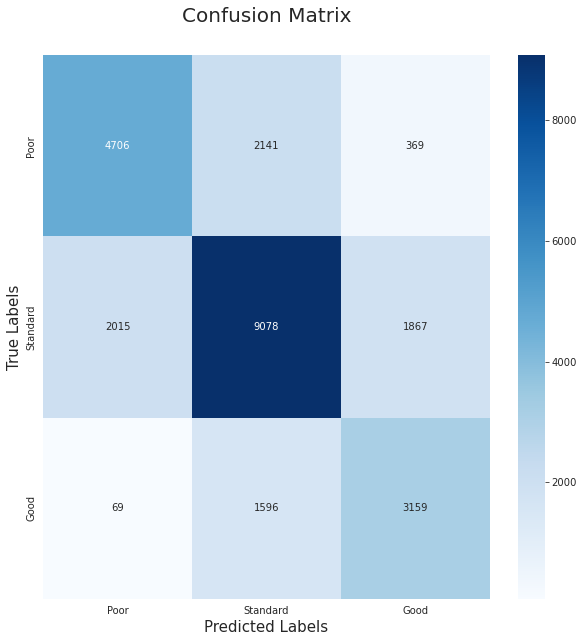

In [29]:
clf_report_plot(y_valid, X_valid, lgb_clf)

In [31]:
acc = lgb_clf.score(X_valid, y_valid)
print('Accuracy of LGBM: ', acc)

Accuracy of LGBM:  0.67772


### 4-2. Log Transformation

In [ ]:
def log_transform_do(cols, input_data):
    """
    로그변환을 위한 코드
    params :
      cols : 인코딩 대상 features
      input_data : 원본 데이터
    """

    data = input_data.copy()

    for col in cols:
        data[col] = np.log(data[col])

    return data

### 4-3. SQRT Transformation

In [ ]:
def sqrt_transform_do(cols, input_data):
    """
    sqrt 처리를 위한 코드
    param:
      cols : 인코딩 대상 features
      data : 전처리를 위한 데이터
    """

    data = input_data.copy()

    for col in cols:
        data[col] = np.sqrt(data[col])

    return data

### 4-4. Generating Dummy

In [ ]:
def dummy_make_do(cols, input_data, thresh=5):
    """
    특정값을 기준으로 Y/N 더미변수로 만들기 위한 함수
    params:
      cols : 전처리 대상 features
      data : 원본 데이터
      thresh : 0/1 으로 만들기 위한 기준
    """

    data = input_data.copy()

    for col in cols:
        data[col] = data.apply(get_dummy, axis=1, args=[col,thresh])
    return data

def get_dummy(df, col ,thresh=5):

    if df[col] >= thresh :
        return 1
    elif df[col] < thresh:
        return 0
    else:
        return 2

### 4-5. Standardization

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler

def standard_transform_do(cols,input_data):
    """
    표준화를 위한 함수
    """

    data = input_data.copy()

    for col in cols:
        scaler = StandardScaler()
        data[col] = scaler.fit_transform(data[col])

    return data

def robust_transform_do(cols,input_data):
    """
    robust 처리를 위한 함수
    """

    data = input_data.copy()

    for col in cols:
        scaler = RobustScaler()
        data[col] = scaler.fit_transform(data[col])

    return data

### 4-6. OHE

In [ ]:
def onehot_do(cols,input_data):
    """
    원핫인코딩을 위한 함수
    원핫인코딩 대상을 처리하고, 전체 데이터를 return
    """
    data = input_data.copy()

    return pd.get_dummies(data,columns=cols)

### 4-7. Binning and Customized Labeling

In [ ]:
#특정 범위별로 구간화 함수
def binning_do (col,input_data,interval):
    """
    구간화를 위한 함수
    params
      col : 구간화 대상 features
      input_data : 원본 데이터
      interval : 구간화를 위한 리스트
        ex)       [3, 5, 7] 입력시
                  0~2 // 3~4 // 5~6 // 7이상으로 자르고 0,1,2,3... 으로 return
    """
    data = input_data.copy()

    data[col] = data.apply(get_label,axis=1,args=[col,interval])

    return data


def get_label(df,col,interval):
    # apply를 위한 함수
    dic = {}

    # 딕셔너리 형태로 범위 만들기
    for value,index in enumerate(interval):
        dic[index] = value

    # 범위안에 드는지 확인
    for i in dic.keys():
        if df[col] < i:
            return dic[i]

    #interval에 포함되지 않는 값은 가장 큰 숫자 return
    return len(dic)

